# Player Profile Parser: Kirby Dach

## Data Pre-processing

In [14]:
# Import libraries
import lucem_illud_2020 as lucem #for text formatting
import pandas as pd # for dataframe manipulations
import docx #for word doc scrapping
import numpy as np 
import re #fore regex calls
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import sklearn.feature_extraction #To vectorize text
import spacy # comp-linguistics
import scipy #Some stats
import networkx as nx # for network analysis
import sklearn #For generating some matrices
import nltk # for nlp processing

# manage warnings
import logging
logger = logging.getLogger("spacy")
logger.setLevel(logging.ERROR)

# to make the plots work better
%matplotlib inline

In [15]:
# import data
file_path = r'C:\Users\pdiaz\Documents\Digital Engagement\Player profiles\Kirby_Dach_Background.docx'
backgrounder = docx.Document(file_path)

In [16]:
# Explore document
for p in backgrounder.paragraphs[:10]:
    print(p.text)

How would family/friends describe you?
Self-motivated, caring, organized, shy, reserved, fun, outdoorsy
Family is big for me. Always interested in what and how are they doing. Borderline nosy at times. Like knowing what’s going on in their lives and asks a ton of questions. I take it as a bad habit, but just want to know what’s going on in their lives.
Brother Colton is 18 and plays for the Saskatoon Blades like I did. We wrestle a couple times a day – can get serious at times.
Sister Callie is 14 and get under her skin by asking the same questions over and over or taking her phone.
Love the outdoors. Grew up on an acreage and have a lake house. Grandmother has a farm which his dad grew up on. Same with mom and was raised that way. Spend a lot of time in the woods, on the water, hunting, and fishing. Like being outside far more than inside. Did not play video games until 14 or 15. Would rather be outside kicking soccer ball or kicking a can. Could get in trouble. Really like the freedo

In [17]:
# arrange content into paragraph observations, indexed by the questions
par_dic = {'question':[],
          'paragraph':[]}
for p in backgrounder.paragraphs:
    if '?' in p.text:
        q = p.text
    else:
        pass
    par_dic['question'].append(q)
    par_dic['paragraph'].append(p.text)


In [18]:
# create dictionary
kd_back = pd.DataFrame(par_dic)
# remove rows with questions as paragraphs
kd_back = kd_back[~kd_back.paragraph.str.contains('\?')]

<>:4: DeprecationWarning: invalid escape sequence \?


In [19]:
kd_back


question  \
1              How would family/friends describe you?   
2              How would family/friends describe you?   
3              How would family/friends describe you?   
4              How would family/friends describe you?   
5              How would family/friends describe you?   
6              How would family/friends describe you?   
8                    How would you describe yourself?   
9                    How would you describe yourself?   
10                   How would you describe yourself?   
12          How would coaches/teammates describe you?   
14                  Who do you look up to as mentors?   
15                  Who do you look up to as mentors?   
16                  Who do you look up to as mentors?   
17                  Who do you look up to as mentors?   
18                  Who do you look up to as mentors?   
20         What other athletes/leaders do you admire?   
21         What other athletes/leaders do you admire?   
22         What other athletes/leaders do you admire?   
23         What other athletes/leaders do you admire?   
24         What other athletes/leaders do you admire?   
25         What other athletes/leaders do you admire?   
27      What are some cool experiences you have had?    
29  Is there a company/brand that messed up that b...   
31                               Kirby of the future?   
33                                 Off-ice interests?   
34                                 Off-ice interests?   
35                                 Off-ice interests?   
36                                 Off-ice interests?   
38          What do you want others to see about you?   
39          What do you want others to see about you?   
41                   Player/Brand platform in action?   
42                   Player/Brand platform in action?   
43                   Player/Brand platform in action?   
44                   Player/Brand platform in action?   
45                   Player/Brand platform in action?   
46                   Player/Brand platform in action?   
47                   Player/Brand platform in action?   
48                   Player/Brand platform in action?   
49                   Player/Brand platform in action?   
50                   Player/Brand platform in action?   
51                   Player/Brand platform in action?   
52                   Player/Brand platform in action?   
54                        Pick 1 of the 2 word pairs?   
55                        Pick 1 of the 2 word pairs?   
56                        Pick 1 of the 2 word pairs?   
57                        Pick 1 of the 2 word pairs?   
59                     What statement most resonates?   
61                             Social media presence?   
63                                            Growth?   

                                            paragraph  
1   Self-motivated, caring, organized, shy, reserv...  
2   Family is big for me. Always interested in wha...  
3   Brother Colton is 18 and plays for the Saskato...  
4   Sister Callie is 14 and get under her skin by ...  
5   Love the outdoors. Grew up on an acreage and h...  
6   Grew up in Fort Saskatchewan, about 30 minutes...  
8   Serious, focused. Laid-back, but knows when I ...  
9   Struggled first year in Saskatoon. 2nd year ne...  
10  Routines: Same thing before games since 14. Ea...  
12  Trustworthy, motivated, hard-working, dedicate...  
14  Toews (Tazer): speaks up in moment, focused on...  
15  Seabrook (Seabs): vocal, especially on ice. Ma...  
16   Shaw (Shawsy): vocal as well, missing his voice.  
17  Keith (Dunc): more to himself, but learned a ton.  
18  Kane (Kaner): uses his trainer. If he can stil...  
20  Lebron James. Vocalizes his voice and tries to...  
21  Important to give back to where you came from....  
22  Important to have a genuine voice, but athlete...  
23     Likes staying in the moment and being present.  
24  Really admire my dad – has his own business an...  
25  Dad (Dale) pla

In [20]:
#create list of sentences from each paragraph
nlp = spacy.load('en_core_web_sm')

def sent_tokenize(word_list, model=nlp):
    doc = model(word_list)
    sentences = [str(sent).strip() for sent in doc.sents]
    return sentences

kd_back['sentences'] = kd_back['paragraph'].apply(lambda x: [lucem.word_tokenize(s) for s in sent_tokenize(str(x))])
kd_back

C:\Users\pdiaz\Anaconda3\lib\site-packages\spacy\util.py:1174: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\pdiaz\\Anaconda3\\lib\\site-packages\\en_core_web_sm\\en_core_web_sm-3.0.0\\tok2vec\\model'>
  reader(path / key)
C:\Users\pdiaz\Anaconda3\lib\site-packages\spacy\util.py:1174: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\pdiaz\\Anaconda3\\lib\\site-packages\\en_core_web_sm\\en_core_web_sm-3.0.0\\tagger\\model'>
  reader(path / key)
C:\Users\pdiaz\Anaconda3\lib\site-packages\spacy\util.py:1174: ResourceWarning: unclosed file <_io.BufferedReader name='C:\\Users\\pdiaz\\Anaconda3\\lib\\site-packages\\en_core_web_sm\\en_core_web_sm-3.0.0\\senter\\model'>
  reader(path / key)


question  \
1              How would family/friends describe you?   
2              How would family/friends describe you?   
3              How would family/friends describe you?   
4              How would family/friends describe you?   
5              How would family/friends describe you?   
6              How would family/friends describe you?   
8                    How would you describe yourself?   
9                    How would you describe yourself?   
10                   How would you describe yourself?   
12          How would coaches/teammates describe you?   
14                  Who do you look up to as mentors?   
15                  Who do you look up to as mentors?   
16                  Who do you look up to as mentors?   
17                  Who do you look up to as mentors?   
18                  Who do you look up to as mentors?   
20         What other athletes/leaders do you admire?   
21         What other athletes/leaders do you admire?   
22         What other athletes/leaders do you admire?   
23         What other athletes/leaders do you admire?   
24         What other athletes/leaders do you admire?   
25         What other athletes/leaders do you admire?   
27      What are some cool experiences you have had?    
29  Is there a company/brand that messed up that b...   
31                               Kirby of the future?   
33                                 Off-ice interests?   
34                                 Off-ice interests?   
35                                 Off-ice interests?   
36                                 Off-ice interests?   
38          What do you want others to see about you?   
39          What do you want others to see about you?   
41                   Player/Brand platform in action?   
42                   Player/Brand platform in action?   
43                   Player/Brand platform in action?   
44                   Player/Brand platform in action?   
45                   Player/Brand platform in action?   
46                   Player/Brand platform in action?   
47                   Player/Brand platform in action?   
48                   Player/Brand platform in action?   
49                   Player/Brand platform in action?   
50                   Player/Brand platform in action?   
51                   Player/Brand platform in action?   
52                   Player/Brand platform in action?   
54                        Pick 1 of the 2 word pairs?   
55                        Pick 1 of the 2 word pairs?   
56                        Pick 1 of the 2 word pairs?   
57                        Pick 1 of the 2 word pairs?   
59                     What statement most resonates?   
61                             Social media presence?   
63                                            Growth?   

                                            paragraph  \
1   Self-motivated, caring, organized, shy, reserv...   
2   Family is big for me. Always interested in wha...   
3   Brother Colton is 18 and plays for the Saskato...   
4   Sister Callie is 14 and get under her skin by ...   
5   Love the outdoors. Grew up on an acreage and h...   
6   Grew up in Fort Saskatchewan, about 30 minutes...   
8   Serious, focused. Laid-back, but knows when I ...   
9   Struggled first year in Saskatoon. 2nd year ne...   
10  Routines: Same thing before games since 14. Ea...   
12  Trustworthy, motivated, hard-working, dedicate...   
14  Toews (Tazer): speaks up in moment, focused on...   
15  Seabrook (Seabs): vocal, especially on ice. Ma...   
16   Shaw (Shawsy): vocal as well, missing his voice.   
17  Keith (Dunc): more to himself, but learned a ton.   
18  Kane (Kaner): uses his trainer. If he can stil...   
20  Lebron James. Vocalizes his voice and tries to...   
21  Important to give back to where you came from....   
22  Important to have a genuine voice, but athlete...   
23     Likes staying in the moment and being present.   
24  Really admire my dad – has his own business an... 

In [21]:
#create list of words from each paragraph
kd_back['tokenized_words'] = kd_back['paragraph'].apply(lambda x: [s for s in lucem.word_tokenize(str(x))])
kd_back['normalized_words'] = kd_back['tokenized_words'].apply(lambda x: lucem.normalizeTokens(x))
kd_back

question  \
1              How would family/friends describe you?   
2              How would family/friends describe you?   
3              How would family/friends describe you?   
4              How would family/friends describe you?   
5              How would family/friends describe you?   
6              How would family/friends describe you?   
8                    How would you describe yourself?   
9                    How would you describe yourself?   
10                   How would you describe yourself?   
12          How would coaches/teammates describe you?   
14                  Who do you look up to as mentors?   
15                  Who do you look up to as mentors?   
16                  Who do you look up to as mentors?   
17                  Who do you look up to as mentors?   
18                  Who do you look up to as mentors?   
20         What other athletes/leaders do you admire?   
21         What other athletes/leaders do you admire?   
22         What other athletes/leaders do you admire?   
23         What other athletes/leaders do you admire?   
24         What other athletes/leaders do you admire?   
25         What other athletes/leaders do you admire?   
27      What are some cool experiences you have had?    
29  Is there a company/brand that messed up that b...   
31                               Kirby of the future?   
33                                 Off-ice interests?   
34                                 Off-ice interests?   
35                                 Off-ice interests?   
36                                 Off-ice interests?   
38          What do you want others to see about you?   
39          What do you want others to see about you?   
41                   Player/Brand platform in action?   
42                   Player/Brand platform in action?   
43                   Player/Brand platform in action?   
44                   Player/Brand platform in action?   
45                   Player/Brand platform in action?   
46                   Player/Brand platform in action?   
47                   Player/Brand platform in action?   
48                   Player/Brand platform in action?   
49                   Player/Brand platform in action?   
50                   Player/Brand platform in action?   
51                   Player/Brand platform in action?   
52                   Player/Brand platform in action?   
54                        Pick 1 of the 2 word pairs?   
55                        Pick 1 of the 2 word pairs?   
56                        Pick 1 of the 2 word pairs?   
57                        Pick 1 of the 2 word pairs?   
59                     What statement most resonates?   
61                             Social media presence?   
63                                            Growth?   

                                            paragraph  \
1   Self-motivated, caring, organized, shy, reserv...   
2   Family is big for me. Always interested in wha...   
3   Brother Colton is 18 and plays for the Saskato...   
4   Sister Callie is 14 and get under her skin by ...   
5   Love the outdoors. Grew up on an acreage and h...   
6   Grew up in Fort Saskatchewan, about 30 minutes...   
8   Serious, focused. Laid-back, but knows when I ...   
9   Struggled first year in Saskatoon. 2nd year ne...   
10  Routines: Same thing before games since 14. Ea...   
12  Trustworthy, motivated, hard-working, dedicate...   
14  Toews (Tazer): speaks up in moment, focused on...   
15  Seabrook (Seabs): vocal, especially on ice. Ma...   
16   Shaw (Shawsy): vocal as well, missing his voice.   
17  Keith (Dunc): more to himself, but learned a ton.   
18  Kane (Kaner): uses his trainer. If he can stil...   
20  Lebron James. Vocalizes his voice and tries to...   
21  Important to give back to where you came from....   
22  Important to have a genuine voice, but athlete...   
23     Likes staying in the moment and being present.   
24  Really admire my dad – has his own business an... 

## Word Counts
Single-word, bigram, trigram, POS word counts and wordcloud

In [22]:
countsDict = {}
for word in kd_back['normalized_words'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
        word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
        word_counts[:100]

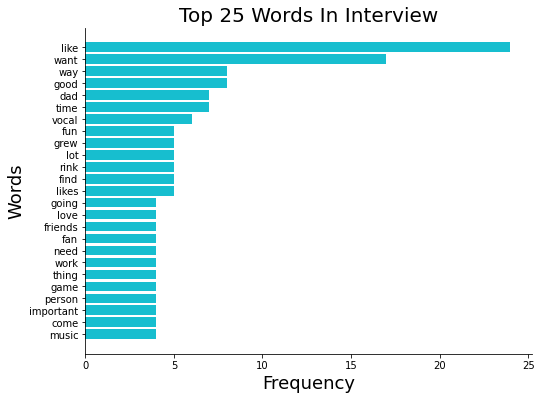

In [23]:
#plotting the top overall words
wordCounts = pd.DataFrame(word_counts,columns=['words','count'])

topWords = wordCounts.iloc[:25,:]
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(topWords['words'],topWords['count'],
        facecolor='tab:cyan')
ax.set_title('Top 25 Words In Interview',
             fontsize=20)
ax.set_ylabel('Words',
              fontsize=18)
ax.set_xlabel('Frequency',
              fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
#plt.savefig("bot_wordcount.png", format = 'png', bbox_inches='tight')

In [24]:
#find the top bigrams 
bigrams = nltk.collocations.BigramCollocationFinder.from_words(kd_back['normalized_words'].sum())
bigram_measures = nltk.collocations.BigramAssocMeasures()
top25_bigrams = bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:25]
top25_bigrams = pd.DataFrame(top25_bigrams, columns=['words','score'])
top25_bigrams['words'] = top25_bigrams['words'].apply(lambda x: x[0] + ' ' + x[1])

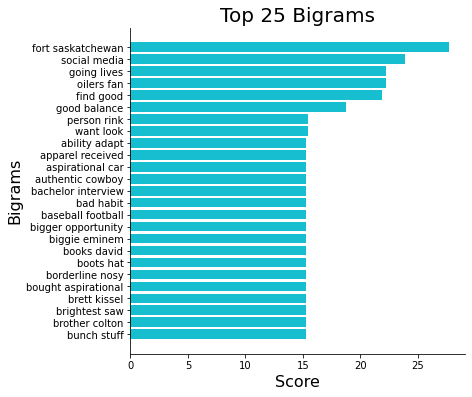

In [25]:
#plot the top bigrams 
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(top25_bigrams['words'],top25_bigrams['score'],
         facecolor='tab:cyan')
ax.set_title('Top 25 Bigrams',
             fontsize=20)
ax.set_ylabel('Bigrams',
              fontsize=16)
ax.set_xlabel('Score',
              fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
#plt.savefig("bot_bigrams.png", format = 'png', bbox_inches='tight')

In [26]:
#find the top trigrams 
trigrams = nltk.collocations.TrigramCollocationFinder.from_words(kd_back['normalized_words'].sum())
trigram_measures = nltk.collocations.TrigramAssocMeasures()
top25_trigrams = trigrams.score_ngrams(trigram_measures.likelihood_ratio)[:25]
top25_trigrams = pd.DataFrame(top25_trigrams, columns=['words','score'])
top25_trigrams['words'] = top25_trigrams['words'].apply(lambda x: x[0] + ' ' + x[1] + ' '+ x[2])

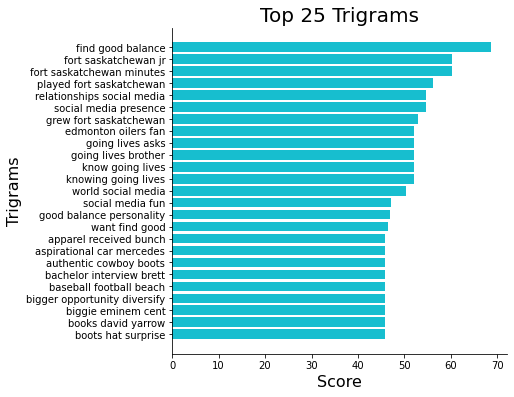

In [27]:
#plot the top trigrams 
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(top25_trigrams['words'],top25_trigrams['score'],
         facecolor='tab:cyan')
ax.set_title('Top 25 Trigrams',
             fontsize=20)
ax.set_ylabel('Trigrams',
              fontsize=16)
ax.set_xlabel('Score',
              fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
#plt.savefig("bot_bigrams.png", format = 'png', bbox_inches='tight')

In [28]:
# define function to get the POS for each word
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags
 
# normalize words using their POS
kd_back['normalized_tokens_POS'] = [spacy_pos(t) for t in kd_back['paragraph']]
 
# then get the frequency distribution of each POS
kdfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in kd_back['normalized_tokens_POS'].sum())
 
# then get top adjectives to check it worked
kdfdist_POStoWord['JJ'].most_common(10)

[('same', 9),
 ('good', 8),
 ('serious', 5),
 ('vocal', 5),
 ('important', 4),
 ('other', 4),
 ('big', 3),
 ('genuine', 3),
 ('social', 3),
 ('much', 3)]

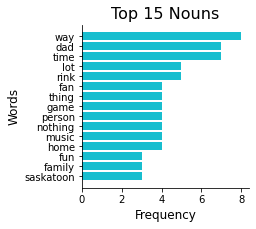

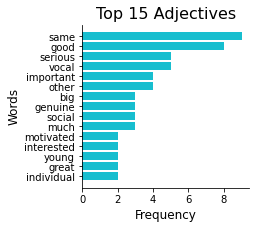

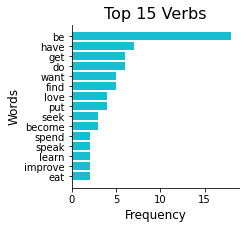

In [29]:
# create a plot for the top nouns, adjectives, verbs and adverbs
Nouns = pd.DataFrame(kdfdist_POStoWord['NN'].most_common(15), columns=['word', 'count'])
Nouns.name = 'Nouns'
Adjectives = pd.DataFrame(kdfdist_POStoWord['JJ'].most_common(15), columns=['word', 'count'])
Adjectives.name = 'Adjectives'
Verbs = pd.DataFrame(kdfdist_POStoWord['VB'].most_common(15), columns=['word', 'count'])
Verbs.name = 'Verbs'
# Adverbs = pd.DataFrame(kdfdist_POStoWord['AVB'].most_common(15), columns=['word', 'count'])
# Adverbs.name = 'Adverbs'
 
dfs = [Nouns,Adjectives,Verbs]
for df in dfs:
    name = df.name
    fig, ax = plt.subplots(figsize=(3,3))
    ax.barh(df['word'],df['count'],
           facecolor='tab:cyan')
    ax.set_title('Top 15 {}'.format(name), fontsize=16)
    ax.set_ylabel('Words',
                  fontsize=12)
    ax.set_xlabel('Frequency',
                  fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.invert_yaxis()

(-0.5, 999.5, 999.5, -0.5)

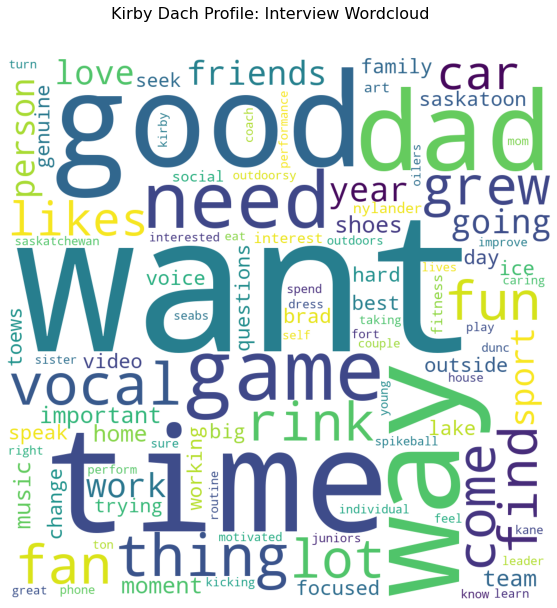

In [236]:
# get a word cloud
plt.figure(figsize=(10,10))
plt.suptitle('Kirby Dach Profile: Interview Wordcloud',
            fontsize=16,
            y=.95)
wc = wordcloud.WordCloud(background_color="white", max_words=100, width= 2000, height = 2000, mode ='RGBA', scale=.5).generate(' '.join(kd_back['normalized_words'].sum()))
plt.imshow(wc)
plt.axis("off")
#plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## Network analysis
This portion of the document uses the coocurrence of words within sentences to create a network of words connected by their ocurrence in the same sentences. The output includes:
 * Ranking of words by degree centrality (number of connections)
 * Ranking of words by betweenness centrality (links / shortest paths between separate portions of the network)
 * Visual of words with the strongest connections
 * Visual of words with the most connections
 * Visual of networks for individual (central) words

In [12]:
# # manage warnings
# import logging
# logger = logging.getLogger("spacy")
# logger.setLevel(logging.ERROR)

#normalize sentences
kd_back['normalized_sents'] = kd_back['sentences'].apply(lambda x: [lucem.normalizeTokens(s) for s in x])
kd_back

question  \
1              How would family/friends describe you?   
2              How would family/friends describe you?   
3              How would family/friends describe you?   
4              How would family/friends describe you?   
5              How would family/friends describe you?   
6              How would family/friends describe you?   
8                    How would you describe yourself?   
9                    How would you describe yourself?   
10                   How would you describe yourself?   
12          How would coaches/teammates describe you?   
14                  Who do you look up to as mentors?   
15                  Who do you look up to as mentors?   
16                  Who do you look up to as mentors?   
17                  Who do you look up to as mentors?   
18                  Who do you look up to as mentors?   
20         What other athletes/leaders do you admire?   
21         What other athletes/leaders do you admire?   
22         What other athletes/leaders do you admire?   
23         What other athletes/leaders do you admire?   
24         What other athletes/leaders do you admire?   
25         What other athletes/leaders do you admire?   
27      What are some cool experiences you have had?    
29  Is there a company/brand that messed up that b...   
31                               Kirby of the future?   
33                                 Off-ice interests?   
34                                 Off-ice interests?   
35                                 Off-ice interests?   
36                                 Off-ice interests?   
38          What do you want others to see about you?   
39          What do you want others to see about you?   
41                   Player/Brand platform in action?   
42                   Player/Brand platform in action?   
43                   Player/Brand platform in action?   
44                   Player/Brand platform in action?   
45                   Player/Brand platform in action?   
46                   Player/Brand platform in action?   
47                   Player/Brand platform in action?   
48                   Player/Brand platform in action?   
49                   Player/Brand platform in action?   
50                   Player/Brand platform in action?   
51                   Player/Brand platform in action?   
52                   Player/Brand platform in action?   
54                        Pick 1 of the 2 word pairs?   
55                        Pick 1 of the 2 word pairs?   
56                        Pick 1 of the 2 word pairs?   
57                        Pick 1 of the 2 word pairs?   
59                     What statement most resonates?   
61                             Social media presence?   
63                                            Growth?   

                                            paragraph  \
1   Self-motivated, caring, organized, shy, reserv...   
2   Family is big for me. Always interested in wha...   
3   Brother Colton is 18 and plays for the Saskato...   
4   Sister Callie is 14 and get under her skin by ...   
5   Love the outdoors. Grew up on an acreage and h...   
6   Grew up in Fort Saskatchewan, about 30 minutes...   
8   Serious, focused. Laid-back, but knows when I ...   
9   Struggled first year in Saskatoon. 2nd year ne...   
10  Routines: Same thing before games since 14. Ea...   
12  Trustworthy, motivated, hard-working, dedicate...   
14  Toews (Tazer): speaks up in moment, focused on...   
15  Seabrook (Seabs): vocal, especially on ice. Ma...   
16   Shaw (Shawsy): vocal as well, missing his voice.   
17  Keith (Dunc): more to himself, but learned a ton.   
18  Kane (Kaner): uses his trainer. If he can stil...   
20  Lebron James. Vocalizes his voice and tries to...   
21  Important to give back to where you came from....   
22  Important to have a genuine voice, but athlete...   
23     Likes staying in the moment and being present.   
24  Really admire my dad – has his own business an... 

In [19]:
# create function to track cooccurence of words in sentences
def wordCooccurrence(sentences, makeMatrix = False):
    # create a set of unique words
    words = set()
    # loop over sentences in each paragraph
    for sent in sentences:
        # add the set of words in sentence to word set
        words |= set(sent)
    # transform into a list    
    wordLst = list(words)
    # capture indices of words in order to later track cooccurence
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    # open dictionary of word counts
    wordCoCounts = {}
    # create a n x n empty matrix, where n = len(word list)
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    # loop over sentences one more time
    for sent in sentences:
        # and over the words in each sentence
        for i, word1 in enumerate(sent):
            # get the index of the word, captured above
            word1Index = wordIndices[word1]
            # loop over all the other words following word1 in the sentence
            for word2 in sent[i + 1:]:
                # update the value of the cooccurence matrix 
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        # we need to capture both the Aij and Aji coocurrences (so we invert and add the matrix to itself)
        coOcMat = coOcMat.T + coOcMat
        # convert the matrix into a graph
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        # relabel the nodes using the index and the word
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [20]:
# create graph and get its size
g = wordCooccurrence(kd_back['normalized_sents'].sum())

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 483
Number of edges: 1557
Average degree:   6.4472


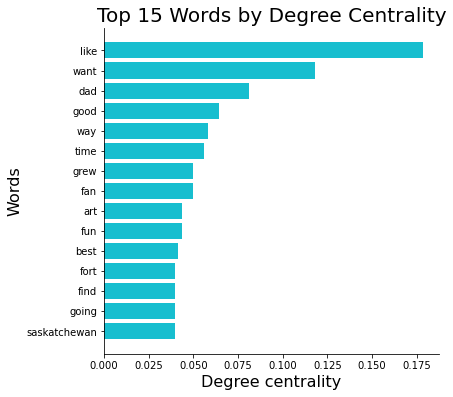

In [21]:
# get the most degree central words
dcentralities = nx.degree_centrality(g)
dcentralities = pd.DataFrame(sorted(dcentralities.items(), 
                                    key = lambda x: x[1], 
                                    reverse = True)[:15],
                            columns=['Words','Degree centrality'])

#plot the top words by degree centrality  
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(dcentralities['Words'],dcentralities['Degree centrality'],
         facecolor='tab:cyan')
ax.set_title('Top 15 Words by Degree Centrality',
             fontsize=20)
ax.set_ylabel('Words',
              fontsize=16)
ax.set_xlabel('Degree centrality',
              fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

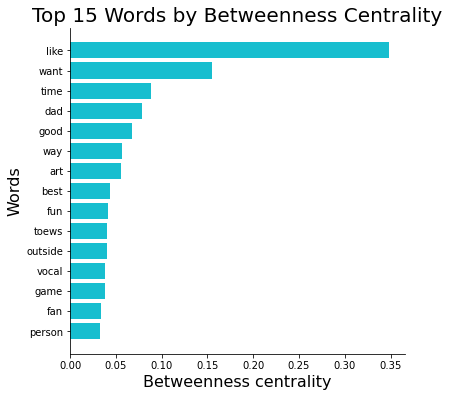

In [22]:
# get the most betweeness central words
bcentralities = nx.betweenness_centrality(g)
bcentralities = pd.DataFrame(sorted(bcentralities.items(),
                                    key = lambda x: x[1],
                                    reverse = True)[:15],
                            columns=['Words','Betweenness centrality'])

#plot the top words by degree centrality  
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(bcentralities['Words'],bcentralities['Betweenness centrality'],
         facecolor='tab:cyan')
ax.set_title('Top 15 Words by Betweenness Centrality',
             fontsize=20)
ax.set_ylabel('Words',
              fontsize=16)
ax.set_xlabel('Betweenness centrality',
              fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

In [23]:
# remove isolates from graph
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 480
Number of edges: 1557
Average degree:   6.4875


In [100]:
# # remove all nodes with less than the average weight
mean_weight = np.mean([d['weight'] for n1, n2, d in g.edges(data = True)])
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= mean_weight])
print(nx.info(g))
print(mean_weight)

Name: 
Type: Graph
Number of nodes: 483
Number of edges: 67
Average degree:   0.2774
1.046242774566474


In [101]:
# create function to generate connected components
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [102]:
# create highly connected subgraph
conn_g = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(conn_g))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 41
Average degree:   2.4118


In [27]:
wMean = np.mean([d['weight'] for n1, n2, d in conn_g.edges(data = True)])
wMean

2.1219512195121952

In [28]:
# get the degree centrality of each node in the remaining network
conn_dcentralities = nx.degree_centrality(conn_g)

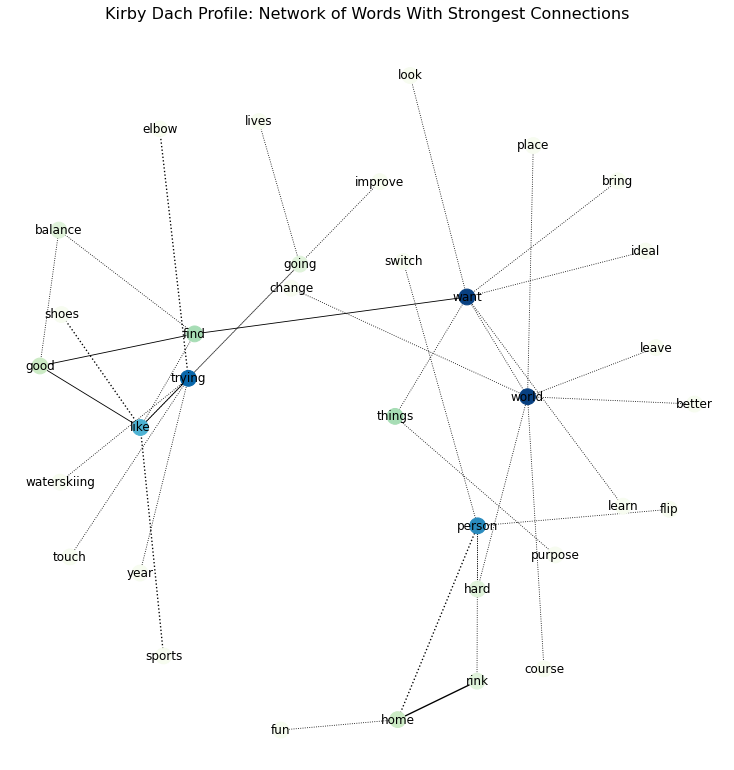

In [210]:
# visualize the graph

# get the top quantile of weights
wTop = np.quantile([d['weight'] for n1, n2, d in conn_g.edges(data = True)], 0.50)

# label the edges above and below
edgesHigh = [(n1, n2) for n1, n2, d in conn_g.edges(data = True) if d['weight'] > wTop]
edgesLow = [(n1, n2) for n1, n2, d in conn_g.edges(data = True) if d['weight'] <= wTop]

# get the max centrality measure to scale color of the nodes
maxC = max(conn_dcentralities.items(), key = lambda x : x[1])[1]

# create figure
plt.figure(figsize=(10,10))
plt.suptitle('Kirby Dach Profile: Network of Words With Strongest Connections',
            y = 1.05,
            fontsize=16)

# create layout using Fruchterman-Reingold force-directed algorithm (larger ks separate the nodes)
layout = nx.spring_layout(conn_g, k = 1, weight='weight', iterations= 50)

# draw the graph
nx.draw(conn_g,
        pos = layout,
        node_size = 250,
        node_color = [conn_dcentralities[n] / maxC for n in conn_g.nodes()],
        labels = {n:n for n in conn_g.nodes()}, 
        edgelist = edgesLow,
        style='dotted', 
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in conn_g.edges(data = True)],
        cmap = plt.get_cmap('GnBu'))
nx.draw(conn_g, pos = layout, nodelist=None,
        node_color = [conn_dcentralities[n] / maxC for n in conn_g.nodes()],
        node_size = [conn_dcentralities[n] / maxC for n in conn_g.nodes()],
        edgelist = edgesHigh, 
        cmap = plt.get_cmap('GnBu'),
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in conn_g.edges(data = True)])

In [30]:
# trim graph by community
trim_g = wordCooccurrence(kd_back['normalized_sents'].sum())
trim_g = nx.Graph(trim_g)
trim_g.remove_nodes_from([n for n in trim_g.nodes if len(set(trim_g.neighbors(n))) <= 7.5]) 
trim_g.remove_nodes_from(list(nx.isolates(trim_g)))
print(nx.info(g))
print(nx.info(trim_g))

Name: 
Type: Graph
Number of nodes: 480
Number of edges: 67
Average degree:   0.2792
Name: 
Type: Graph
Number of nodes: 116
Number of edges: 454
Average degree:   7.8276


In [31]:
# get the degree centrality of each node in the remaining network
trim_dcentralities = nx.degree_centrality(trim_g)

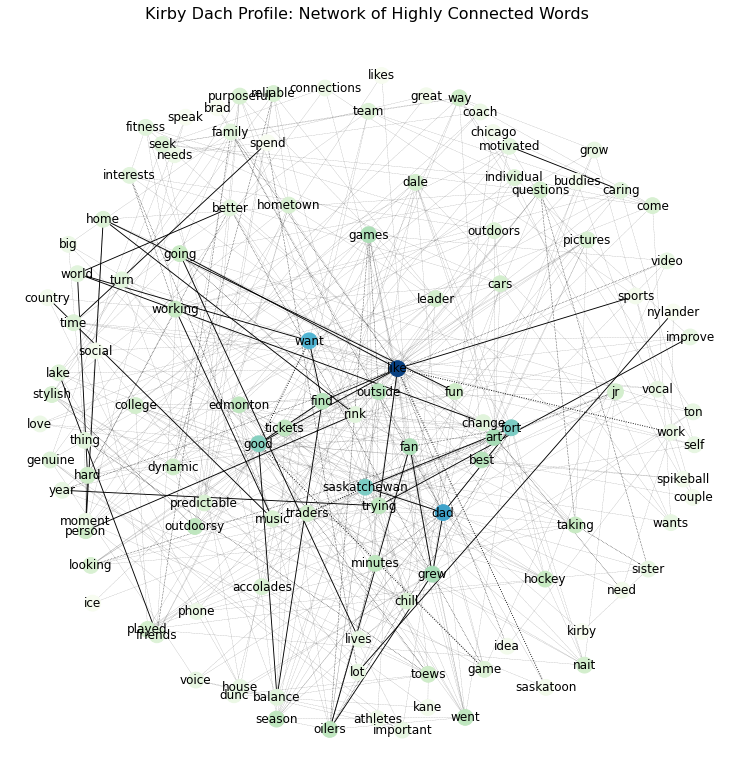

In [222]:
# visualize the graph

# get the top quantile of weights
wTop = np.quantile([d['weight'] for n1, n2, d in trim_g.edges(data = True)], 0.50)

# label the edges above and below
edgesHigh = [(n1, n2) for n1, n2, d in trim_g.edges(data = True) if d['weight'] > wTop]
edgesLow = [(n1, n2) for n1, n2, d in trim_g.edges(data = True) if d['weight'] <= wTop]

# get the max centrality measure to scale color of the nodes
maxC = max(trim_dcentralities.items(), key = lambda x : x[1])[1]

# create figure
plt.figure(figsize=(10,10))
plt.suptitle('Kirby Dach Profile: Network of Highly Connected Words',
            y = 1.05,
            fontsize=16)

# create layout using Fruchterman-Reingold force-directed algorithm (larger ks separate the nodes)
layout = nx.spring_layout(trim_g, k = 1.5, weight='weight', iterations= 50)

# draw the graph
nx.draw(trim_g,
        pos = layout,
        node_size = 250,
        node_color = [trim_dcentralities[n] / maxC for n in trim_g.nodes()],
        labels = {n:n for n in trim_g.nodes()}, 
        edgelist = edgesLow,
        style='dotted', 
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in trim_g.edges(data = True)],
        cmap = plt.get_cmap('GnBu'))
nx.draw(trim_g, pos = layout, nodelist=None,
        node_color = [trim_dcentralities[n] / maxC for n in trim_g.nodes()],
        node_size = [trim_dcentralities[n] / maxC for n in trim_g.nodes()],
        edgelist = edgesHigh, 
        cmap = plt.get_cmap('GnBu'),
        width=.9)

In [55]:
g = wordCooccurrence(kd_back['normalized_sents'].sum())

likeNeighbors = g.neighbors('like')
g_like = g.subgraph(likeNeighbors)
print(nx.info(g_like))

Name: 
Type: Graph
Number of nodes: 86
Number of edges: 177
Average degree:   4.1163


In [59]:
# # find subgraphs based on neighbors of most central words
# g = wordCooccurrence(kd_back['normalized_sents'].sum())

# likeNeighbors = g.neighbors('like')
# likeNeighborsPlus1 = set(likeNeighbors)
# for n in likeNeighbors:
#     likeNeighborsPlus1 |= set(g.neighbors(n))

# g_like2 = g.subgraph(likeNeighborsPlus1)
# print(nx.info(g_like2))


Name: 
Type: Graph
Number of nodes: 86
Number of edges: 177
Average degree:   4.1163


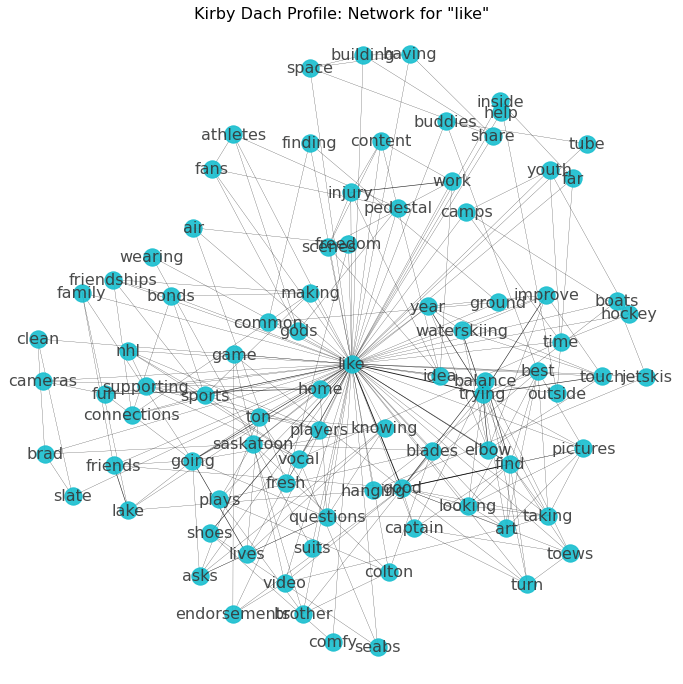

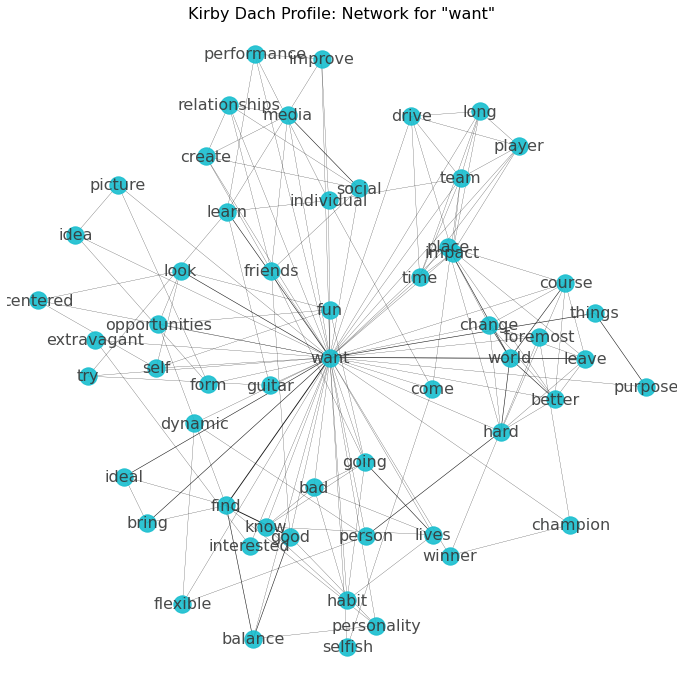

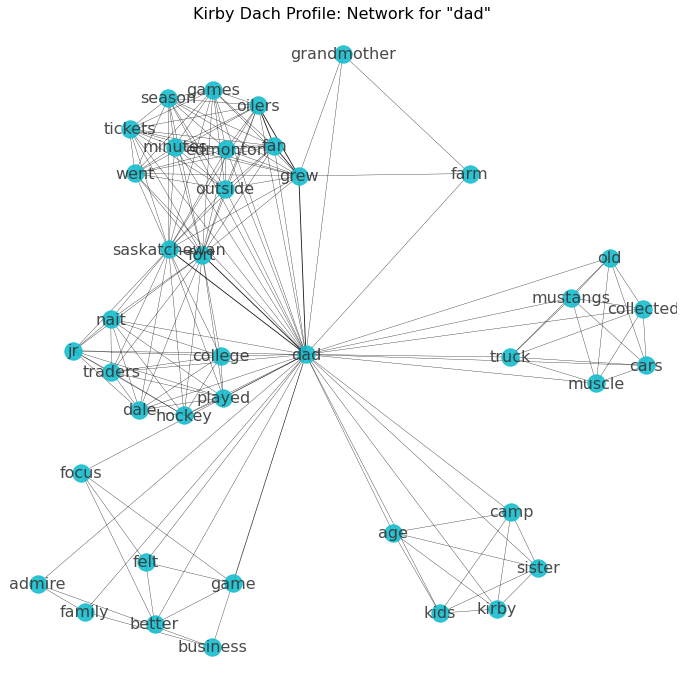

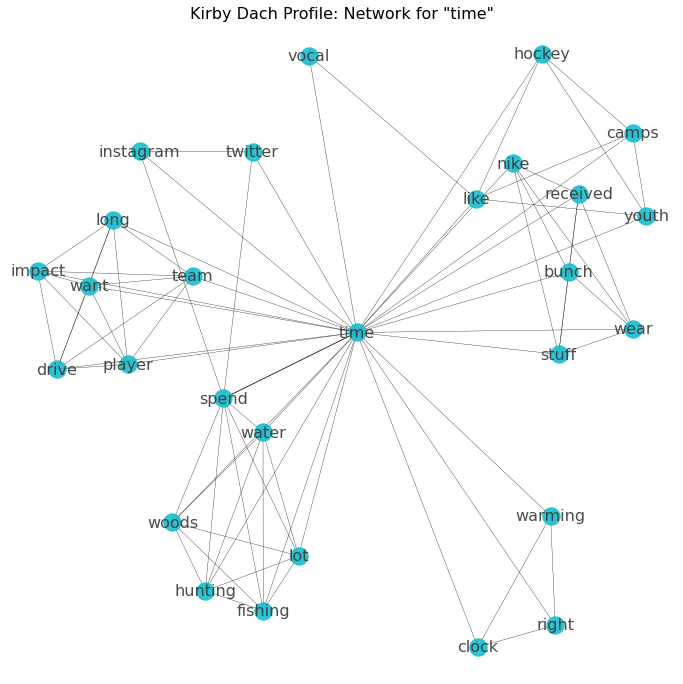

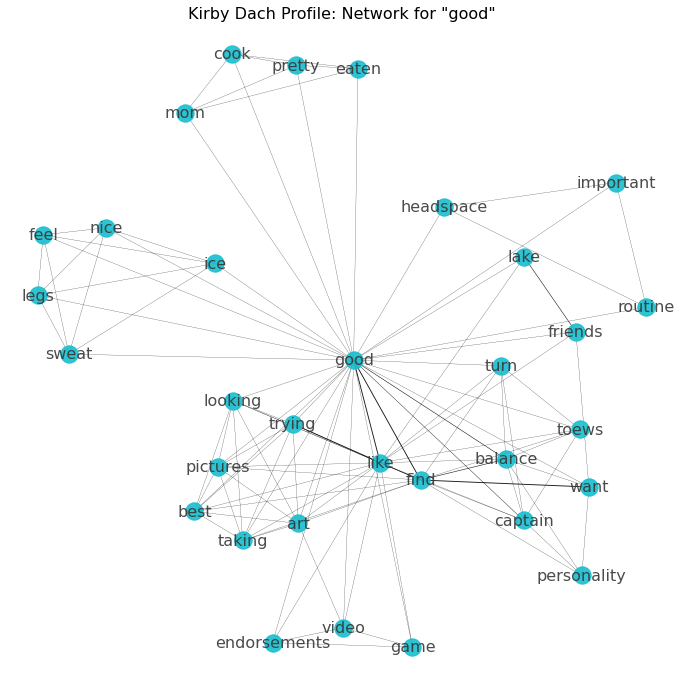

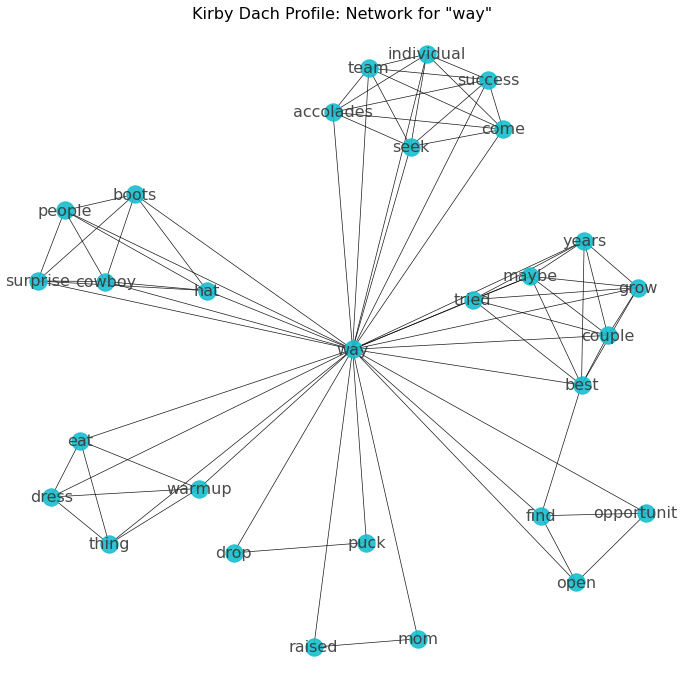

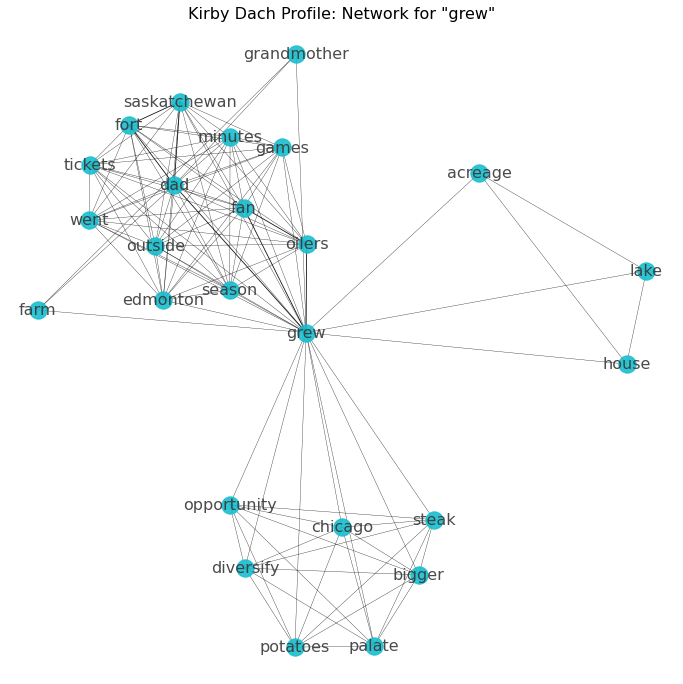

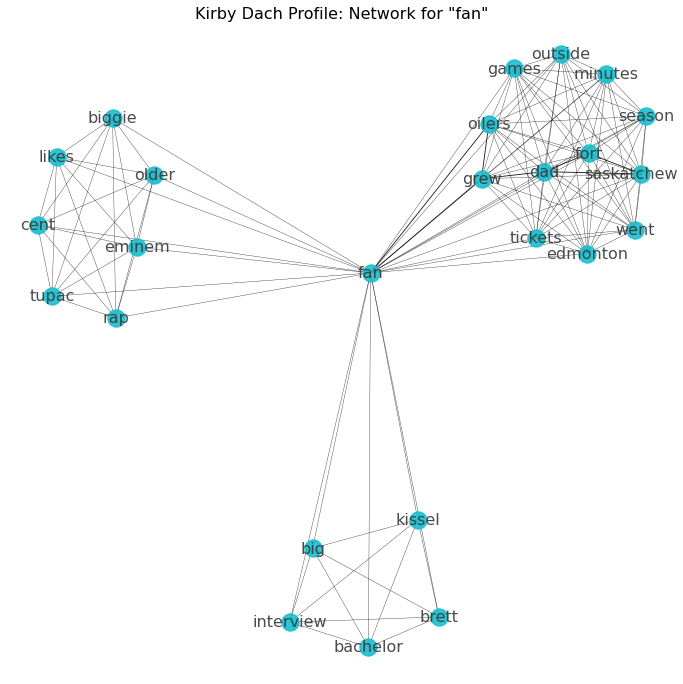

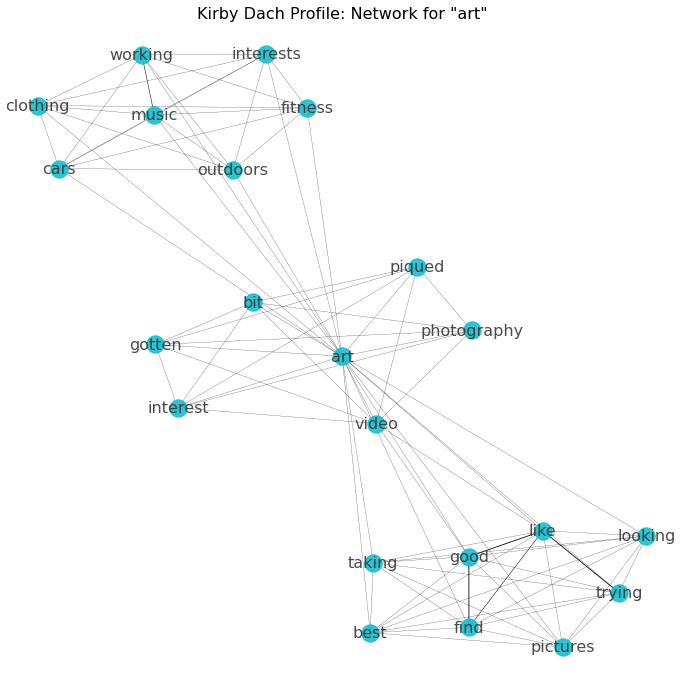

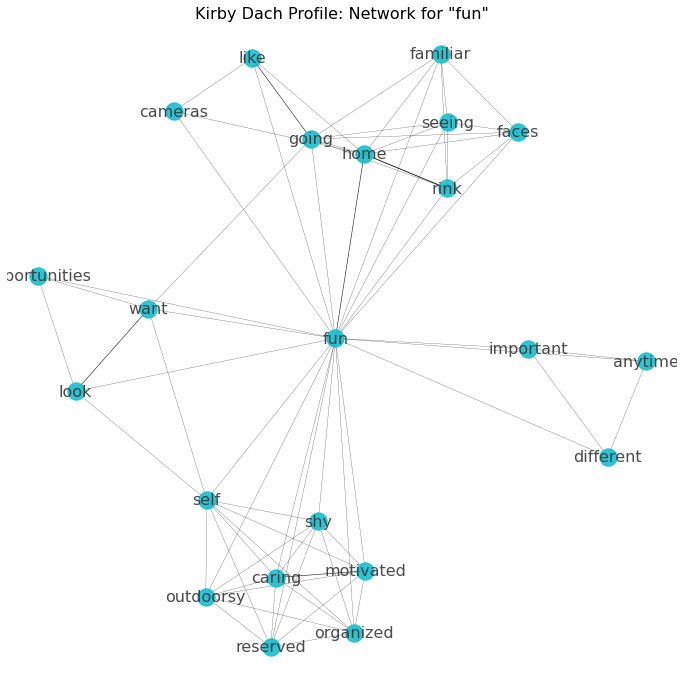

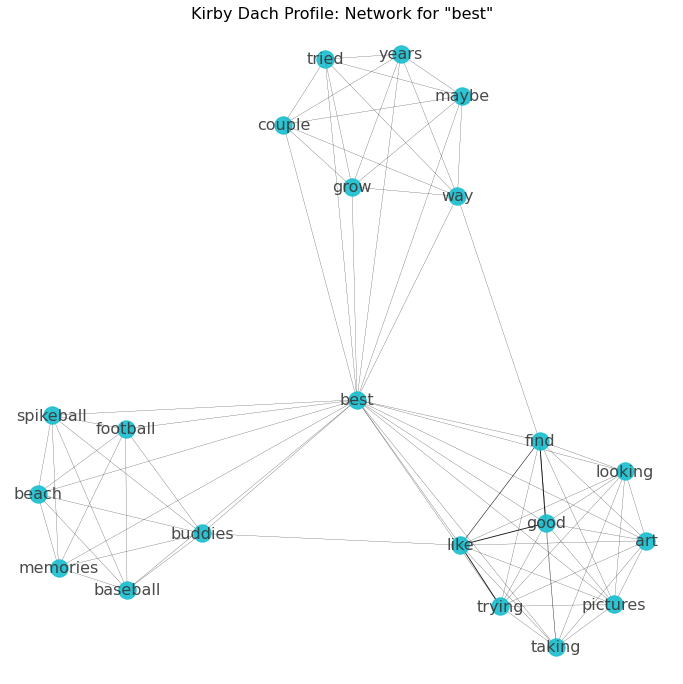

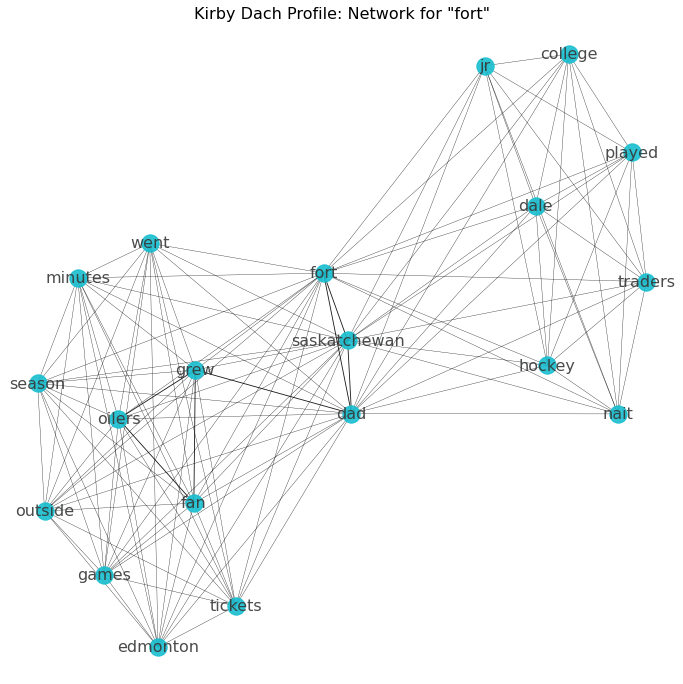

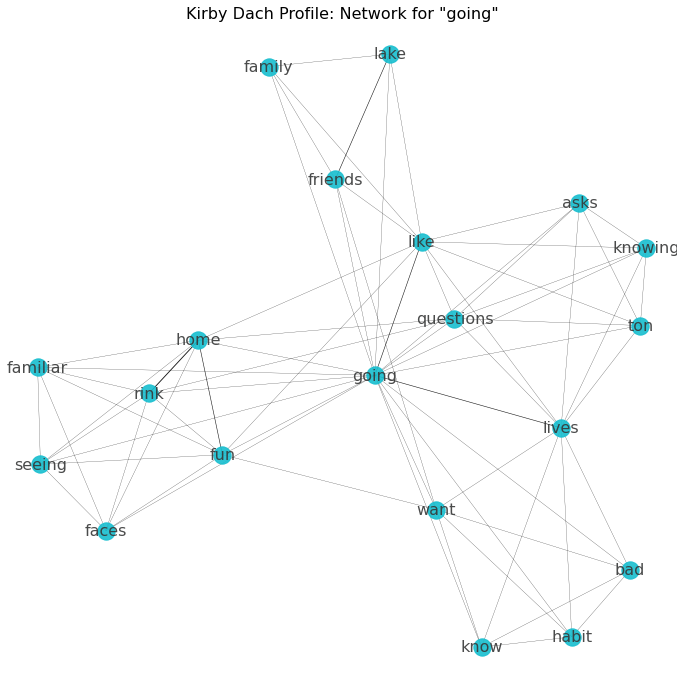

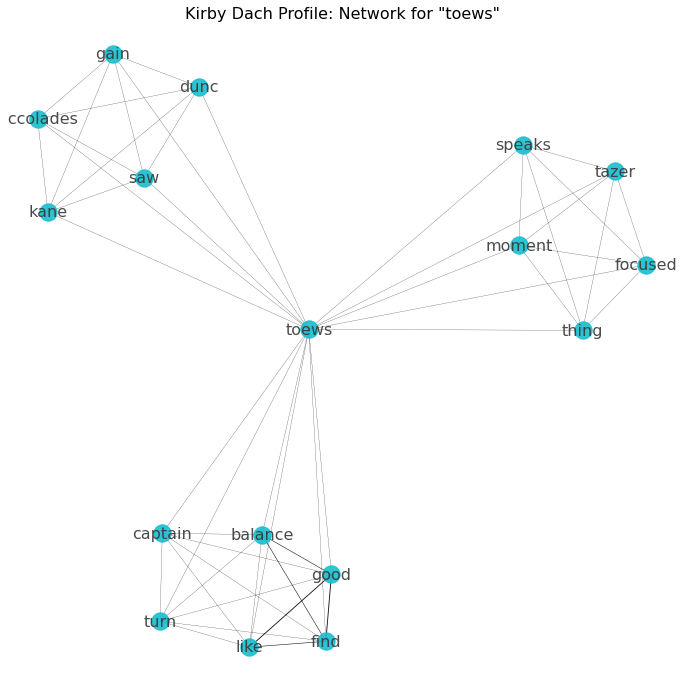

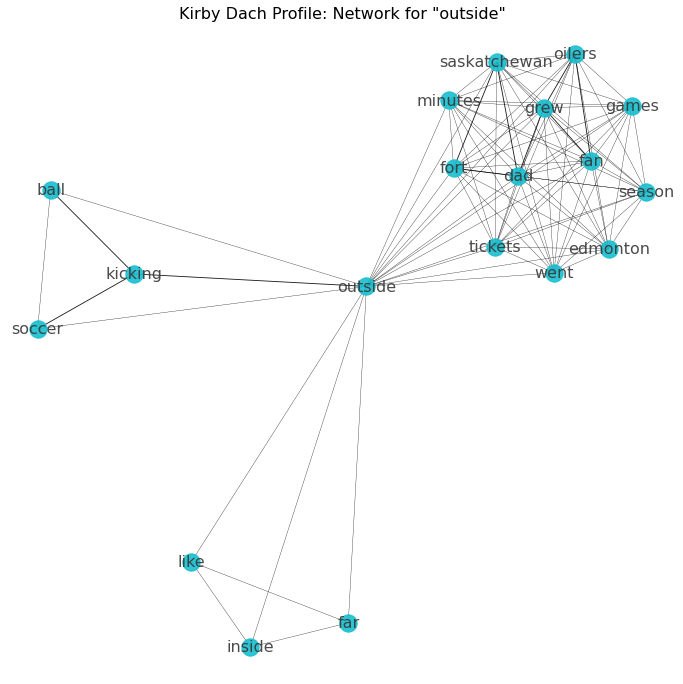

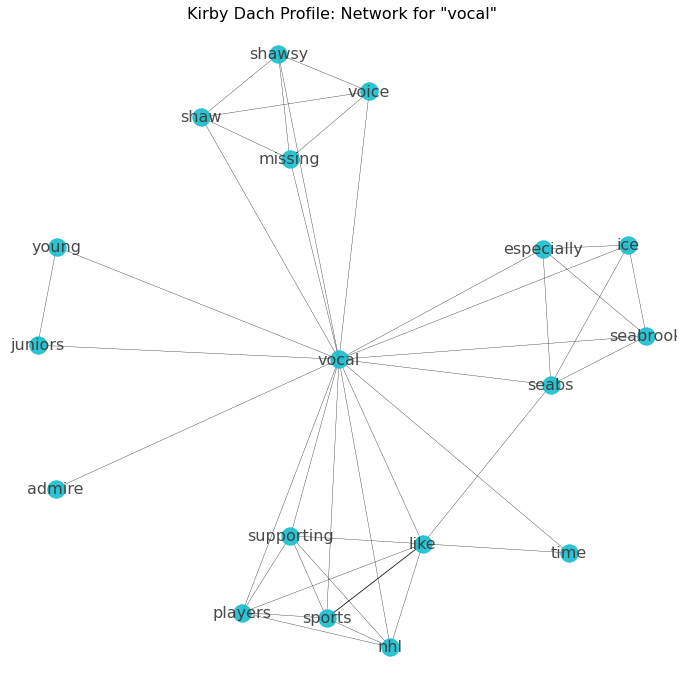

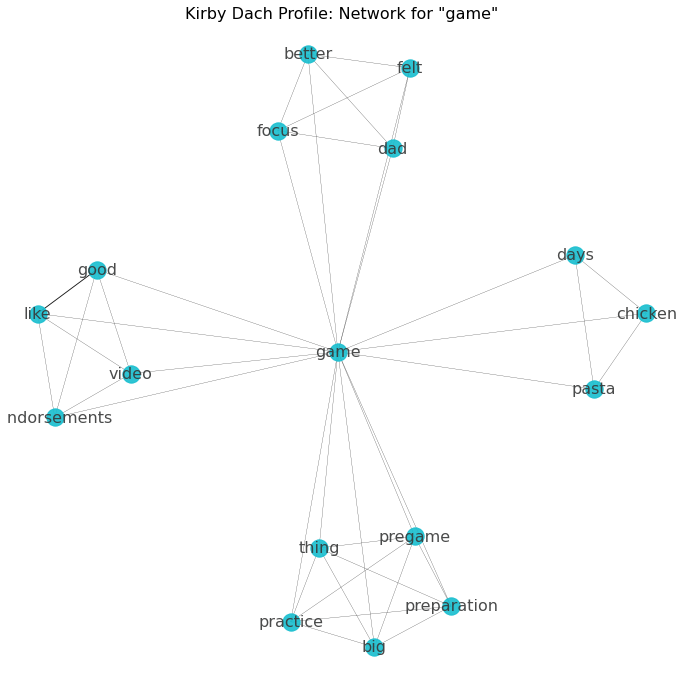

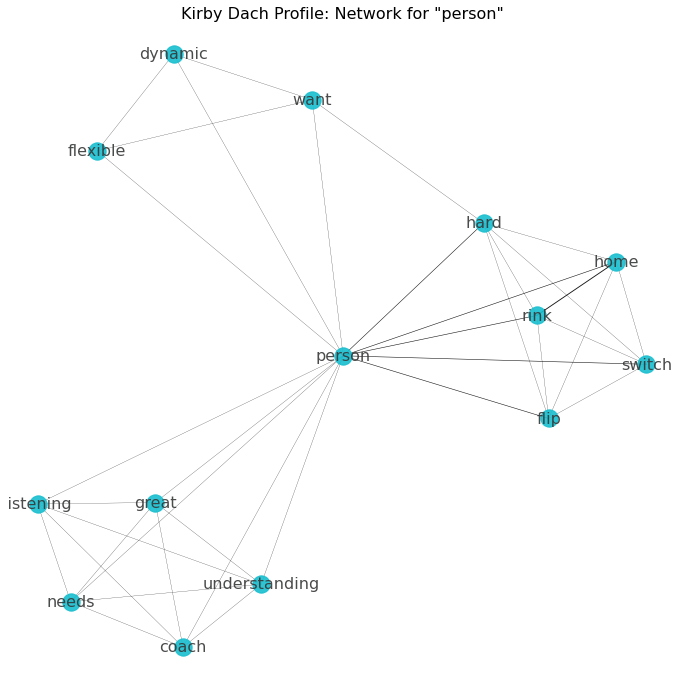

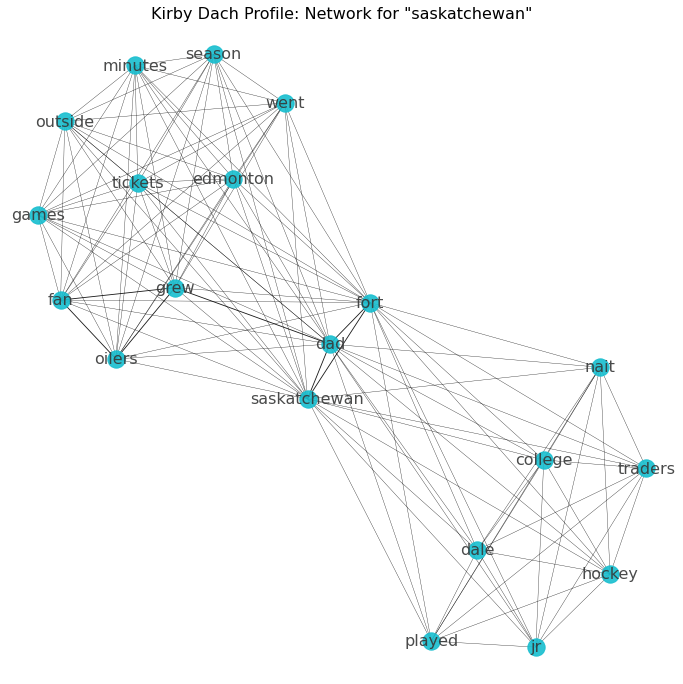

In [216]:
# visualize the graphs for the most central words
g = wordCooccurrence(kd_back['normalized_sents'].sum())

words = ['like', 'want', 'dad', 'time', 'good', 'way', 'grew', 'fan', 'art',
        'fun', 'best', 'fort', 'going', 'toews', 'outside', 'vocal', 'game',
        'person', 'saskatchewan']

for word in words:
    wordNeighbors = set(g.neighbors(word))
    wordNeighbors |= set([word])
    g_word = g.subgraph(wordNeighbors)
    

    layout_pres = nx.spring_layout(g_word, weight='weight', iterations= 100, k = 1.5)
    fig, ax = plt.subplots(figsize = (12,12))
    maxWeight = max((d['weight'] for n1, n2, d in g_word.edges(data = True)))
    minWeight = min((d['weight'] for n1, n2, d in g_word.edges(data = True)))
    nx.draw(g_word, ax = ax, pos = layout_pres, labels = {n:n for n in g_word.nodes()},
            width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_word.edges(data = True)], 
            alpha = .9, 
            font_size = 16,
            font_color = 'xkcd:dark grey',
            node_color = 'tab:cyan')
    ax.set_title('Kirby Dach Profile: Network for "{}"'.format(word),
                fontsize=16)

## Network analysis by POS
This section replicates the above cooccurrence analysis, but tagging each word by their POS. This allows to explore subgraphs of words such as 'like' - which otherwise are too cluttered.

In [104]:
nlp = spacy.load('en_core_web_sm')

In [107]:
# create function to track cooccurrence of words and their POS
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        # loop over words and tag their POS
        s = [(w, t) for w, t in lucem.spacy_pos(sent) if t in posType]
        for w, t in s:
            # save their POS in a dictionary
            if w not in wordsMap:
                wordsMap[w] = t
        # then perform same coocurrence calculation as before        
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            # add the POS dic as a bipartite link to the final network
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

Name: 
Type: Graph
Number of nodes: 64
Number of edges: 130
Average degree:   4.0625


Text(0.5, 1.0, 'Kirby Dach Profile: Network of Nouns')

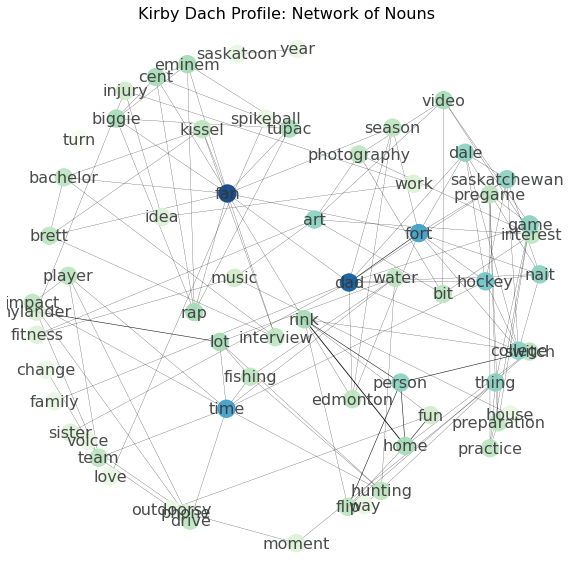

In [219]:
# explore the network of nouns
gPOS = posCooccurrence(kd_back['normalized_sents'].sum(), 'NN')
gPOS.remove_nodes_from([n for n in gPOS.nodes if len(set(gPOS.neighbors(n))) <= 3]) 
print(nx.info(gPOS))

layout_nn = nx.spring_layout(gPOS, k=2, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.degree_centrality(gPOS)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gPOS.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gPOS.edges(data = True)))
nx.draw(gPOS, ax = ax, pos = layout_nn, labels = {n: n for n in gPOS.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gPOS.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gPOS.nodes],
       # node_size = [centralities_nn[n] / maxC * 100 for n in gPOS.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
       # edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('GnBu'),
       )
ax.set_title('Kirby Dach Profile: Network of Nouns',
                fontsize=16)

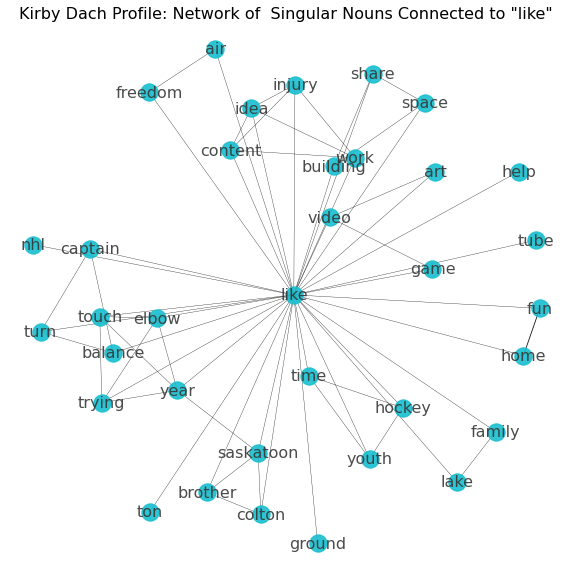

In [229]:
# explore the network of nouns around the word like
gPOS = posCooccurrence(kd_back['normalized_sents'].sum(), 'NN', 'IN')
g_wPOS = gPOS.subgraph(['like'] + list(gPOS.neighbors('like')))

def word_pos_network(graph, word, POS):
    layout_pres = nx.spring_layout(graph, weight='weight', iterations= 100, k = 1.5)
    fig, ax = plt.subplots(figsize = (10,10))
    maxWeight = max((d['weight'] for n1, n2, d in graph.edges(data = True)))
    minWeight = min((d['weight'] for n1, n2, d in graph.edges(data = True)))
    nx.draw(graph, ax = ax, pos = layout_pres, labels = {n:n for n in graph.nodes()},
            width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in graph.edges(data = True)], 
            alpha = .9, 
            font_size = 16,
            font_color = 'xkcd:dark grey',
            node_color = 'tab:cyan')
    ax.set_title('Kirby Dach Profile: Network of {} Connected to "{}"'.format(POS, word),
                fontsize=16)

word_pos_network(g_wPOS, 'like',' Singular Nouns')


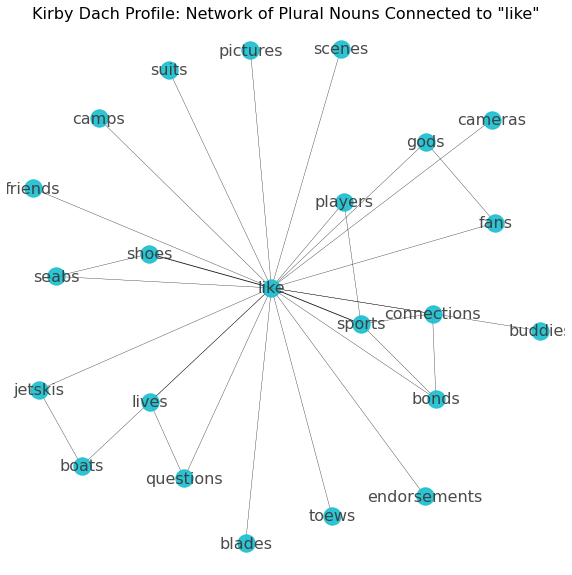

In [228]:
# explore the network of nouns around the word like
gPOS = posCooccurrence(kd_back['normalized_sents'].sum(), 'NNS', 'IN')
g_wPOS = gPOS.subgraph(['like'] + list(gPOS.neighbors('like')))

word_pos_network(g_wPOS, 'like','Plural Nouns')

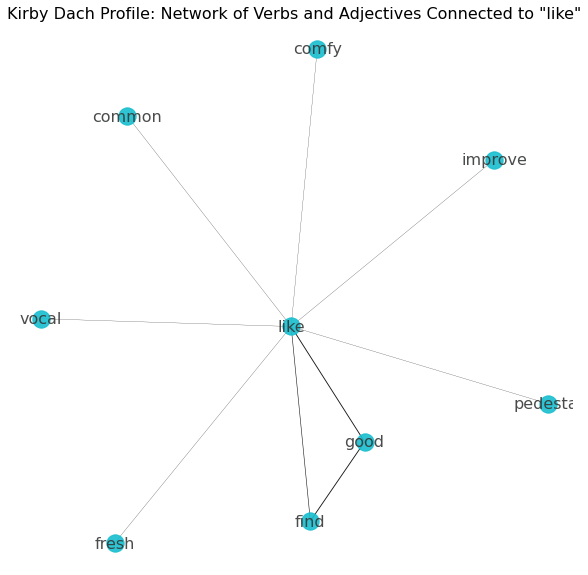

In [230]:
# explore the network of adjectives and verbs around the word like
gPOS = posCooccurrence(kd_back['normalized_sents'].sum(), 'JJ', 'IN', 'VB')
g_wPOS = gPOS.subgraph(['like'] + list(gPOS.neighbors('like')))

word_pos_network(g_wPOS, 'like','Verbs and Adjectives')

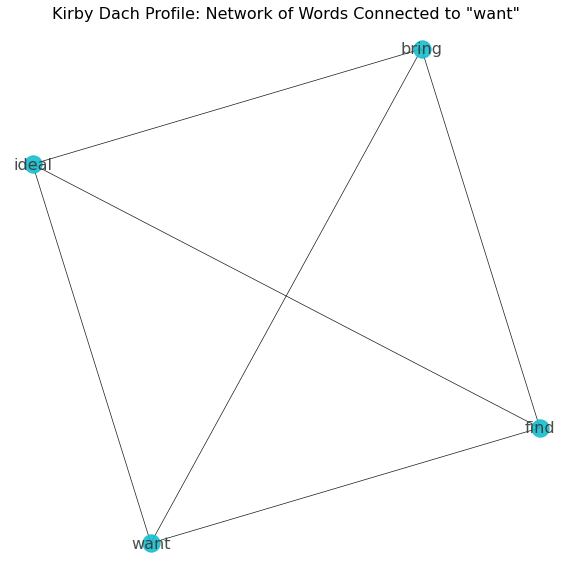

In [255]:
# explore the network of nouns and verbs surrounding the word want
gPOS = posCooccurrence(kd_back['normalized_sents'].sum(), 'NN', 'VB', 'JJ', 'JJR')
g_wPOS = gPOS.subgraph(['want'] + list(gPOS.neighbors('want')))

word_pos_network(g_wPOS, 'want','Words')

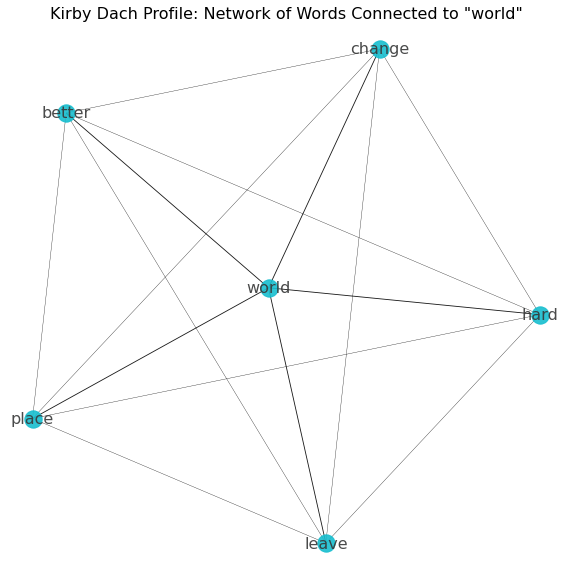

In [231]:
# explore the network of nouns and verbs surrounding the word want
gPOS = posCooccurrence(kd_back['normalized_sents'].sum(), 'NN', 'VB', 'JJ', 'JJR')
g_wPOS = gPOS.subgraph(['world'] + list(gPOS.neighbors('world')))

word_pos_network(g_wPOS, 'world','Words')

In [254]:
for p in kd_back['normalized_tokens_POS']:
    for w, t in p:
        if w == 'create':
            print(t)
        else:
            continue

VB


## Network analysis of paragraphs connected by words
In this section, we invert the graph. Instead of looking at words connected by sentences, we look at paragrpahs connected by words. The output includes:
 * Ranking of paragraphs by their centrality
 * Visualization of the paragraph network
 * Printed text of central paragraphs

In [168]:
# define function to tokenize text, which we will feed into the sci-kit learn vectorizer
def tokenize(text):
    tokenlist = lucem.word_tokenize(text)
    normalized = lucem.normalizeTokens(tokenlist)
    return normalized

In [251]:
# transform the text into a document-term frequency matrix
kdVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
kdVects_incidence = kdVectorizer.fit_transform(kd_back['paragraph'])

[2021-03-17 18:47:03,745] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'self'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,754] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '-'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,756] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'motivated'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,757] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,758]

[2021-03-17 18:47:03,812] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'how'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,814] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,815] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,816] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'doing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,817]

[2021-03-17 18:47:03,850] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'but'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,852] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'just'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,853] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'want'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,854] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,856] [

[2021-03-17 18:47:03,914] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '’s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,916] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'going'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,917] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,918] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,921] [WA

[2021-03-17 18:47:03,989] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '18'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,991] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,992] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'plays'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,993] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:03,994] [

[2021-03-17 18:47:04,037] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'blades'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,038] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'like'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,039] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'i'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,040] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'did'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,041] 

[2021-03-17 18:47:04,088] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'taking'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,089] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'her'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,090] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'phone'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,091] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,106]

[2021-03-17 18:47:04,177] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,178] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,179] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,180] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lake'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,181] [W

[2021-03-17 18:47:04,217] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,218] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,219] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,221] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'water'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,221] [WA

[2021-03-17 18:47:04,254] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'ball'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,255] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'or'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,257] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'kicking'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,257] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,258] 

[2021-03-17 18:47:04,290] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,291] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'love'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,292] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'playing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,294] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'spikeball'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:0

[2021-03-17 18:47:04,352] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,355] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'farm'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,356] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'which'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,358] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'his'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,359] [

[2021-03-17 18:47:04,397] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'more'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,398] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'than'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,399] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'inside'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,417] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'did'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,41

[2021-03-17 18:47:04,467] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,468] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,469] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lot'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,470] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,472] [WARN

[2021-03-17 18:47:04,519] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'saskatchewan'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,523] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,525] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'about'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,526] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '30'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04

[2021-03-17 18:47:04,575] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'edmonton'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,577] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,578] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'an'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,579] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'oilers'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,5

[2021-03-17 18:47:04,641] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'preparation'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,642] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,643] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,644] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'big'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,64

[2021-03-17 18:47:04,681] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'young'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,682] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'so'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,683] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,684] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'doing'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,685]

[2021-03-17 18:47:04,718] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'up'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,719] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'when'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,720] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'something'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,721] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'needs'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04

[2021-03-17 18:47:04,783] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'practice'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,784] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'pregame'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,785] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'or'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,786] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'game'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:0

[2021-03-17 18:47:04,821] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,822] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'leader'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,823] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'lead'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,824] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'by'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,825] [

[2021-03-17 18:47:04,878] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '2nd'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,879] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'year'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,880] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'new'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,881] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'coach'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,882]

[2021-03-17 18:47:04,918] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'each'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,919] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'individual'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,920] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '’s'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:04,921] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'performance'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 1

[2021-03-17 18:47:04,999] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'i'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,000] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'want'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,001] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,002] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'learn'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,004] [W

[2021-03-17 18:47:05,068] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'way'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,069] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'up'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,070] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,072] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'puck'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,073] [WA

[2021-03-17 18:47:05,110] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'right'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,111] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'time'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,112] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,113] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,114] 

[2021-03-17 18:47:05,164] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'put'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,166] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'me'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,168] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,169] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'good'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,170] [WA

[2021-03-17 18:47:05,215] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'working'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,216] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,217] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dedicated'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,218] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,2

[2021-03-17 18:47:05,303] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,305] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'moment'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,306] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'focused'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,308] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,30

[2021-03-17 18:47:05,352] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'guys'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,352] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'up'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,353] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'but'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,354] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'also'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,356] [

[2021-03-17 18:47:05,402] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'great'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,403] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'listener'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,411] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'shaw'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,413] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '('. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,4

[2021-03-17 18:47:05,474] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,485] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'keith'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,486] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dunc'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,487] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'more'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,489] 

[2021-03-17 18:47:05,543] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,552] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'kane'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,554] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'kaner'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,555] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'uses'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,556] 

[2021-03-17 18:47:05,604] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'would'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,606] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n’t'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,607] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,608] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,609] 

[2021-03-17 18:47:05,646] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'obviously'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,647] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'has'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,648] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,649] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'money'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05

[2021-03-17 18:47:05,696] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'did'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,697] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'love'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,698] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'how'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,699] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'he'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,700] [W

[2021-03-17 18:47:05,750] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,751] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'brad'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,752] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'robins'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,753] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,754]

[2021-03-17 18:47:05,799] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,799] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'brad'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,800] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'robins'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,801] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wants'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,

[2021-03-17 18:47:05,858] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'say'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,859] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'so'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,860] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,861] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,862] [WA

[2021-03-17 18:47:05,914] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,915] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,916] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,917] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'genuine'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,918] 

[2021-03-17 18:47:05,957] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'open'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,960] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,961] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'opportunities'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:05,962] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:0

[2021-03-17 18:47:06,067] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'business'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,068] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,070] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'would'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,073] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,0

[2021-03-17 18:47:06,134] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,135] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dad'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,136] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'has'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,137] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'his'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,138] [WA

[2021-03-17 18:47:06,186] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dad'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,189] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '('. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,190] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dale'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,191] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ')'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,193] [WARN

[2021-03-17 18:47:06,258] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n’t'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,259] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'really'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,260] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'done'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,261] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'anything'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:0

[2021-03-17 18:47:06,293] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'elbow'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,294] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ')'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,296] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,297] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'like'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,299] [WA

[2021-03-17 18:47:06,331] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,332] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,333] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'moment'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,334] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,335] 

[2021-03-17 18:47:06,383] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'trying'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,384] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,386] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'touch'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,389] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'his'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,390

[2021-03-17 18:47:06,428] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,429] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'enjoy'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,430] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,431] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'company'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,4

[2021-03-17 18:47:06,489] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,491] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'need'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,492] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,493] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,494] [WARN

[2021-03-17 18:47:06,568] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'once'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,569] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,570] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'week'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,572] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,574] [WA

[2021-03-17 18:47:06,628] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'first'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,629] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,630] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'foremost'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,631] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,63

[2021-03-17 18:47:06,664] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'moments'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,665] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,666] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'perform'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,667] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'when'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06

[2021-03-17 18:47:06,718] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'will'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,719] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'come'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,720] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'along'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,721] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,722

[2021-03-17 18:47:06,751] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'gain'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,752] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'those'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,753] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'accolades'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,770] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'want'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:

[2021-03-17 18:47:06,814] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'always'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,815] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'liked'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,816] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'music'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,817] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'specifically'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 

[2021-03-17 18:47:06,865] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,866] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'would'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,867] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,868] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cool'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,869] [W

[2021-03-17 18:47:06,913] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'would'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,914] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,915] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cool'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,917] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,918] [

[2021-03-17 18:47:06,965] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'be'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,966] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,967] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'extravagant'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,968] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token ','. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:06,9

[2021-03-17 18:47:07,023] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'interview'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,024] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,025] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'brett'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,026] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'kissel'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:4

[2021-03-17 18:47:07,093] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'just'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,094] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,095] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'put'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,096] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'things'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,097]

[2021-03-17 18:47:07,145] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'on'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,146] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'social'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,147] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'media'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,148] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,168] 

[2021-03-17 18:47:07,205] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'even'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,207] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'if'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,208] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'they'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,209] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'are'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,210] [

[2021-03-17 18:47:07,258] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,259] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'been'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,260] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'given'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,262] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'so'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,262]

[2021-03-17 18:47:07,318] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'going'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,319] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,320] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,322] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'rink'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,323] 

[2021-03-17 18:47:07,356] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'like'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,357] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'being'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,358] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'myself'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,359] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'at'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,36

[2021-03-17 18:47:07,417] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'from'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,418] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'nike'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,420] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'i'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,421] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'wear'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,422] [

[2021-03-17 18:47:07,470] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'more'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,470] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'interests'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,472] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,473] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'clothes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:

[2021-03-17 18:47:07,548] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,550] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dad'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,552] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'collected'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,554] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'old'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,556

[2021-03-17 18:47:07,613] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'muscle'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,614] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cars'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,615] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'mustangs'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,616] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'truck'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47

[2021-03-17 18:47:07,669] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'house'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,670] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'music'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,672] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,673] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'rock'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,67

[2021-03-17 18:47:07,716] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'sticks'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,717] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,718] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'country'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,719] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'but'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,7

[2021-03-17 18:47:07,771] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'eat'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,773] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,775] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'chicken'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,780] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,782] 

[2021-03-17 18:47:07,818] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cook'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,819] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,841] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'food'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,843] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'likes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,844] 

[2021-03-17 18:47:07,880] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'well'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,881] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'mom'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,882] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,883] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'good'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,885] [

[2021-03-17 18:47:07,940] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,941] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'best'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,942] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'at'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,943] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'taking'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,943]

[2021-03-17 18:47:07,998] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'seemed'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:07,999] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cool'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,000] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'likes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,001] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'paintings'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:4

[2021-03-17 18:47:08,043] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'that'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,044] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'way'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,045] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,058] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'fitness'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,059]

[2021-03-17 18:47:08,114] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'not'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,116] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'good'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,117] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'at'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,118] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'them'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,133] [

[2021-03-17 18:47:08,172] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'well'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,173] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,174] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'his'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,175] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'sister'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,176]

[2021-03-17 18:47:08,225] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,226] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'his'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,227] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'sister'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,240] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'top'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,241] 

[2021-03-17 18:47:08,310] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'behind'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,311] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,312] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'scenes'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,313] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'content'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:

[2021-03-17 18:47:08,349] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'work'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,350] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,351] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'seems'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,352] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'like'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,353] 

[2021-03-17 18:47:08,397] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'work'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,398] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'through'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,399] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'my'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,400] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'injury'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,

[2021-03-17 18:47:08,436] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'than'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,436] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,438] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'nhl'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,440] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'in'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,441] [W

[2021-03-17 18:47:08,492] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,493] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'work'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,494] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,495] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'nylander'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,49

[2021-03-17 18:47:08,548] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'work'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,549] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'with'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,550] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'nylander'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,551] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'for'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,

[2021-03-17 18:47:08,618] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'predictable'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,620] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'purposeful'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,621] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'chill'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,623] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'reliable'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-

[2021-03-17 18:47:08,674] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,675] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'share'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,676] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,677] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'building'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,678

[2021-03-17 18:47:08,725] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '/'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,726] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'hat'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,727] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,727] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'surprise'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,728] 

[2021-03-17 18:47:08,776] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'dive'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,778] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'into'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,779] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'other'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,780] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'outfits'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08

[2021-03-17 18:47:08,841] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'there'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,842] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'is'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,843] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,844] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'person'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,845] 

[2021-03-17 18:47:08,883] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,884] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'might'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,885] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,886] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'well'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,887] [W

[2021-03-17 18:47:08,936] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'intersection'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,942] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,943] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'home'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,944] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'rink'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:

[2021-03-17 18:47:08,998] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:08,999] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'change'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,000] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'the'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,001] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'world'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,002

[2021-03-17 18:47:09,078] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n’t'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,079] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'have'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,080] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'much'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,081] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,082] [

[2021-03-17 18:47:09,125] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'game'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,126] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,127] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'when'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,128] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'established'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09

[2021-03-17 18:47:09,162] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,163] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'become'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,165] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'genuine'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,166] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,16

[2021-03-17 18:47:09,221] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'kid'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,223] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'do'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,224] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'n’t'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,225] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'need'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,227] [W

[2021-03-17 18:47:09,263] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'want'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,264] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,266] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'form'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,267] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,269] [WA

[2021-03-17 18:47:09,318] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'as'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,319] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'a'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,320] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'person'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,321] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token '.'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,322] [WAR

[2021-03-17 18:47:09,352] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'turn'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,353] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'into'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,355] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'captain'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,356] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'serious'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:

[2021-03-17 18:47:09,407] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'to'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,407] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'succeed'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,408] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'at'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,409] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'what'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,410]

[2021-03-17 18:47:09,443] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'of'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,444] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'personality'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,445] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:09,447] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'being'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2021-03-17 18:47:0

In [171]:
kdVects_incidence.shape

(49, 483)

In [172]:
# turn the frequency matrix into a bipartite network
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((kdVectorizer.get_feature_names()[i] for i in range(kdVects_incidence.shape[1])),
                       bipartite = 'word')
g_2mode.add_nodes_from(range(kdVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, kdVectorizer.get_feature_names()[w],
                         {'weight' : kdVects_incidence[d, w]}) for d, w in zip(*kdVects_incidence.nonzero())))

In [173]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 532
Number of edges: 697
Average degree:   2.6203


In [174]:
# define function to contract network so we can analyze words shared by docs and viceversa
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [175]:
gDoc = contractNetwork(g_2mode, 'doc')

In [176]:
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 358
Average degree:  14.6122


In [179]:
gDoc.remove_nodes_from([n for n in gDoc.nodes if len(set(gDoc.neighbors(n))) <= 10]) 
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 266
Average degree:  16.6250


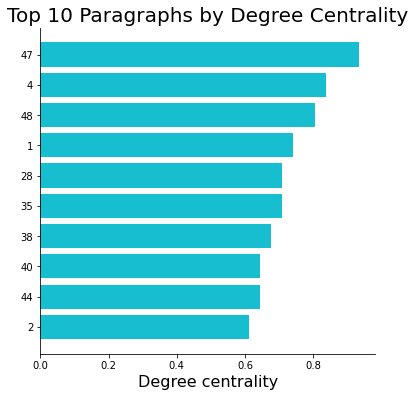

In [245]:
# get the most degree central paragraphs
dcentralities = nx.degree_centrality(gDoc)
dcentralities = pd.DataFrame(sorted(dcentralities.items(), 
                                    key = lambda x: x[1], 
                                    reverse = True)[:10],
                            columns=['Paragraphs','Degree centrality'])
dcentralities['Paragraphs'] = dcentralities['Paragraphs'].apply(str)

#plot the top paragraphs by degree centrality  
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(dcentralities['Paragraphs'],dcentralities['Degree centrality'],
         facecolor='tab:cyan')
ax.set_title('Top 10 Paragraphs by Degree Centrality',
             fontsize=20)
ax.set_ylabel('',
              fontsize=16)
ax.set_xlabel('Degree centrality',
              fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

Text(0.5, 1.0, 'Kirby Dach Profile: Network of Paragraphs Connected by Words')

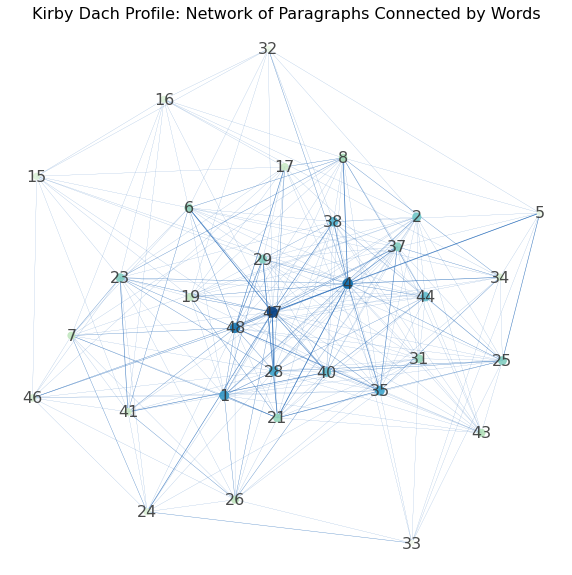

In [232]:
layout_nn = nx.spring_layout(gDoc, k=2, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
centralities_nn = nx.degree_centrality(gDoc)
maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in gDoc.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in gDoc.edges(data = True)))
nx.draw(gDoc, ax = ax, pos = layout_nn, labels = {n: n for n in gDoc.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gDoc.edges(data = True)], 
        alpha = .9, 
        node_color = [centralities_nn[n] / maxC for n in gDoc.nodes],
        node_size = [centralities_nn[n] / maxC * 100 for n in gDoc.nodes],
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:medium blue',
        cmap = plt.get_cmap('GnBu'),
       )
ax.set_title('Kirby Dach Profile: Network of Paragraphs Connected by Words',
             fontsize=16)

In [249]:
# print top paragraphs by degree centrality
for p in dcentralities["Paragraphs"]:
    print('\n')
    print('Paragraph {}'.format(p))
    p = int(p)
    print(kd_back.iloc[p]['paragraph'])



Paragraph 47
Didn’t have much of a social media presence growing up. As a young kid, don’t need to focus on that. Dad felt it would be better to focus on the game. When established, can try to expand. Brad really like that he was a clean slate. Want to form a picture/idea first. Lot of room to grow and become genuine. Need to become more personable via social. Spend most time on Instagram/Twitter.


Paragraph 4
Love the outdoors. Grew up on an acreage and have a lake house. Grandmother has a farm which his dad grew up on. Same with mom and was raised that way. Spend a lot of time in the woods, on the water, hunting, and fishing. Like being outside far more than inside. Did not play video games until 14 or 15. Would rather be outside kicking soccer ball or kicking a can. Could get in trouble. Really like the freedom and fresh air. Not a lot of rules. Always good to have friends out on the lake. Love playing Spikeball and competing on any sport. Like hanging out on his Jetskis and boat

Other central paragraphs based on graph:

In [250]:
for p in [37,6,23]:
    print('\n')
    print('Paragraph {}'.format(p))
    p = int(p)
    print(kd_back.iloc[p]['paragraph'])



Paragraph 37
Would like to do video game endorsements but not good at them. 


Paragraph 6
Serious, focused. Laid-back, but knows when I need to put in work. Preparation is a big thing – whether its practice, pregame or game. Same monotone demeanor when get to the rink. Do my job, speak up when its my turn. Young so not doing now, but was vocal in juniors. Wants to be a leader. Lead by example and actions. Get more vocal in time. Not afraid to speak up when something needs to be said – either positive or constructive criticism. 


Paragraph 23
Want to be a champion/winner first and foremost. Seek team success and individual accolades will come along the way. Want to be an impact player for a long time and drive the team. Seek out key moments to perform when lights are the brightest. Saw Toews/Kane/Dunc gain those accolades. 
